<a href="https://colab.research.google.com/github/Thrisha1906/detecting_gingivitis_AI/blob/main/final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving gingivitis_data.csv to gingivitis_data (1).csv
Index(['plaque_score', 'bleeding_on_probing', 'gum_color',
       'gingivitis_severity'],
      dtype='object')
     plaque_score  bleeding_on_probing  gum_color  gingivitis_severity
0        3.745401             6.420316   1.031239             4.009769
1        9.507143             0.841400   9.025529             4.285076
2        7.319939             1.616287   5.052524             3.907600
3        5.986585             8.985542   8.264575             6.906419
4        1.560186             6.064291   3.200496             3.586651
5        1.559945             0.091971   8.955232             1.107137
6        0.580836             1.014715   3.892017             3.424737
7        8.661761             6.635018   0.108377             5.972976
8        6.011150             0.050616   9.053820             2.939691
9        7.080726             1.608081   0.912867             3.324811
10       0.205845             5.487338   3.193136    

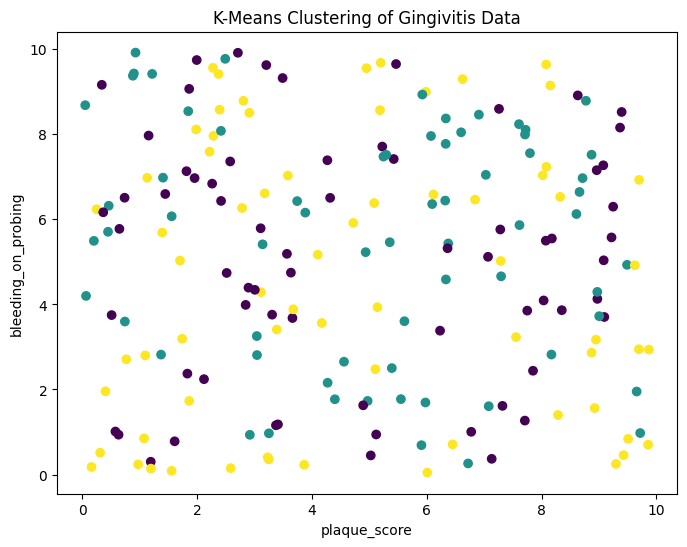

<BarContainer object of 3 artists>

Cluster Centers:
[[  4.70242231   5.11589019  99.        ]
 [  5.09242358   5.49479112  32.5       ]
 [  4.72910769   4.5273047  166.        ]]
Confusion Matrix:
[[24 17 25]
 [21 22 18]
 [22 27 24]]
Mean Squared Error (MSE): 1.35
R-Squared (R²) Value: -0.95
Cluster 0: Sensitivity = 0.36, Specificity = 0.68
Cluster 1: Sensitivity = 0.36, Specificity = 0.68
Cluster 2: Sensitivity = 0.33, Specificity = 0.66


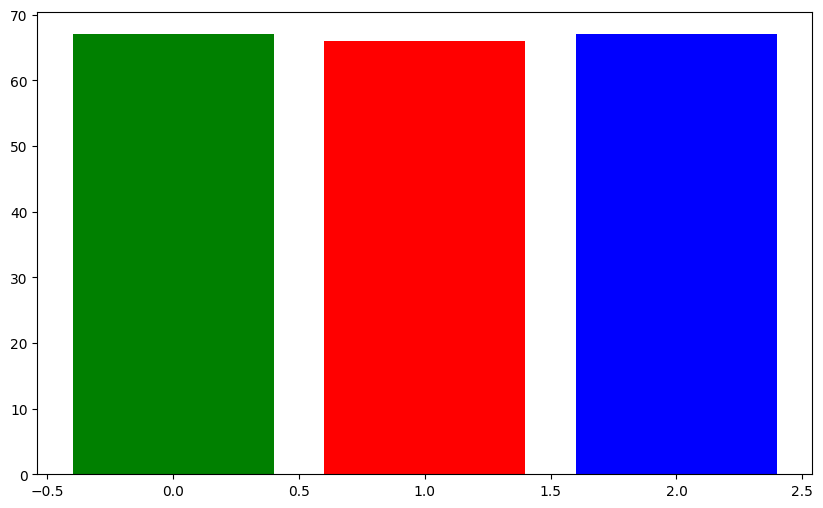

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
#The files object is part of the google.colab module
from google.colab import files

# Load dataset
uploaded = files.upload()

# Access the uploaded file from the 'uploaded' dictionary
df = pd.read_csv(next(iter(uploaded))) # Access the uploaded file within the uploaded dictionary

# Print the actual column names to verify
print(df.columns)

# Display the entire dataset
pd.set_option('display.max_rows', 200)
print(df)

# Prepare the data for clustering
# Use actual column names from the DataFrame ('plaque_score', 'bleeding_on_probing', 'gum_color  ')
X = df[['plaque_score', 'bleeding_on_probing', 'gum_color']].copy() #Fixed typo in column name

# Encode the 'gum_color' column
le = LabelEncoder()
X['gum_color'] = le.fit_transform(X['gum_color']) #Fixed typo in column name

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Assign clusters to the original dataframe
df['Cluster'] = kmeans.labels_

# Plot scatter plot for cluster visualization
plt.figure(figsize=(8, 6))
plt.scatter(df['plaque_score'], df['bleeding_on_probing'], c=df['Cluster'], cmap='viridis')
plt.xlabel('plaque_score') # Use actual column name
plt.ylabel('bleeding_on_probing') # Use actual column name
plt.title('K-Means Clustering of Gingivitis Data')
plt.show()

# Display cluster centers
print('Cluster Centers:')
print(kmeans.cluster_centers_)

# Generate random true labels for evaluation purposes
np.random.seed(42)
df['True_Label'] = np.random.randint(0, 3, size=len(df))

# Compute confusion matrix
cm = confusion_matrix(df['True_Label'], df['Cluster'])
print('Confusion Matrix:')
print(cm)

# Calculate Mean Squared Error and R-squared values
mse = mean_squared_error(df['True_Label'], df['Cluster'])
print(f'Mean Squared Error (MSE): {mse:.2f}')
r2 = r2_score(df['True_Label'], df['Cluster'])
print(f'R-Squared (R²) Value: {r2:.2f}')

# Calculate sensitivity and specificity for each cluster
sensitivities = []
specificities = []

for i in range(cm.shape[0]):
    TP = cm[i, i]  # True Positives
    FN = np.sum(cm[i, :]) - TP  # False Negatives
    FP = np.sum(cm[:, i]) - TP  # False Positives
    TN = np.sum(cm) - (TP + FN + FP)  # True Negatives

    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

    sensitivities.append(sensitivity)
    specificities.append(specificity)

# Display sensitivity and specificity for each cluster
for i in range(len(sensitivities)):
    print(f'Cluster {i}: Sensitivity = {sensitivities[i]:.2f}, Specificity = {specificities[i]:.2f}')

# Create a bar graph to show the number of samples in each cluster
cluster_counts = df['Cluster'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color=['blue', 'green', 'red'], width=0.8)
